# Read train.csv and data modification

In [8]:
#first, import the library from sklearn
from sklearn.model_selection import train_test_split
import sklearn

from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
import random 
import pandas as pd
import numpy as np
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import boxcox
from scipy.stats import norm, skew
from scipy.stats import boxcox_normmax

data = pd.read_csv("/Users/lilian/Desktop/project/project data/train.csv",encoding = "ISO-8859-1")
Data = pd.DataFrame(data)




X =Data[['AreaLiving','Rooms','TravelTimeMiv','BuiltYear','NoisePollutionRoadL',
         'NoisePollutionRoadM','PopulationDensityL','PopulationDensityM','RiversAndLakesL',
        'RiversAndLakesM','WorkplaceDensityL','WorkplaceDensityM','WorkplaceDensityS',
        'gde_politics_cvp','gde_politics_evp','gde_politics_sp','gde_politics_fdp',
         'gde_politics_svp','gde_area_agriculture_percentage','gde_area_forest_percentage','gde_area_nonproductive_percentage',
         'gde_area_settlement_percentage','gde_average_house_hold',
         'gde_empty_apartments','gde_foreigners_percentage','gde_new_homes_per_1000','gde_pop_per_km2',
        'gde_population','gde_private_apartments','gde_social_help_quota','gde_tax','gde_workers_sector1',
         'gde_workers_sector2','gde_workers_sector3','gde_workers_total','Latitude','Longitude',
     'AreaProperty','gde_politics_bdp','Renovationyear','gde_politics_pda','gde_politics_rights']]#,'AreaProperty']]#'Name','GroupNameDe''AreaProperty'
#'location_has_street','location_is_complete',

Xc = Data[['Name','GroupNameDe','StateShort']]
Xc1= Data[['SourceId','RealEstateTypeId','HouseObject','Zip','FloorNumber','location_is_complete',
        'location_has_street']]
Y = Data['PurchasePrice']
Y = np.log1p(Y)

X['AreaProperty']=X['AreaProperty'].fillna(0)
X['AreaLiving'] = np.log1p(X['AreaLiving'])
X['Rooms'] = np.log1p(X['Rooms'])





X= X.drop([38037, 38038])
Xc = Xc.drop([38037, 38038])
Xc1 = Xc1.drop([38037, 38038])
Y =Y.drop([38037, 38038])

X['gde_politics_cvp']=X['gde_politics_cvp'].fillna(0)
X['gde_politics_evp']=X['gde_politics_evp'].fillna(0)
X['gde_politics_fdp']=X['gde_politics_fdp'].fillna(0)
X['gde_politics_sp']=X['gde_politics_sp'].fillna(0)
X['gde_politics_svp']=X['gde_politics_svp'].fillna(0)
X['gde_politics_bdp']=X['gde_politics_bdp'].fillna(0)
X['Renovationyear']=X['Renovationyear'].fillna(0)

Xc1['FloorNumber']=Xc1['FloorNumber'].fillna(-1)
X['gde_politics_pda']=X['gde_politics_pda'].fillna(0)

X['gde_politics_rights'] = X['gde_politics_rights'].fillna(0)
#aera = [0 if values == 0 else np.log1p(values) for values in X.AreaProperty]
#X['AreaProperty'] = aera
# Renovationyear
#year = [X.BuiltYear  if values == 0 else values for values in X.Renovationyear]
#X['Renovationyear'] = year




X['gde_politics_pda'] = np.log1p(X['gde_politics_pda'])

X['RiversAndLakesM']=np.log1p(X['RiversAndLakesM'])

X['RiversAndLakesL']=np.log1p(X['RiversAndLakesL'])

X['WorkplaceDensityL']=np.log1p(X['WorkplaceDensityL'])

X['WorkplaceDensityM']=np.log1p(X['WorkplaceDensityM'])

X['WorkplaceDensityS']=np.log1p(X['WorkplaceDensityS'])

X['TravelTimeMiv']=np.log1p(X['TravelTimeMiv'])

X['BuiltYear']=np.log1p(X['BuiltYear'])
X['Latitude']=np.log1p(X['Latitude'])

#numeric_feats =['gde_workers_sector3','gde_workers_total','gde_private_apartments',
#'gde_population','gde_workers_sector2','gde_new_homes_per_1000','RiversAndLakesM','gde_pop_per_km2','gde_politics_bdp',#',
#'RiversAndLakesL','WorkplaceDensityL','gde_area_nonproductive_percentage','WorkplaceDensityM',
#'WorkplaceDensityS','gde_empty_apartments','gde_workers_sector1','gde_politics_cvp','gde_politics_evp',
#'gde_social_help_quota', 'TravelTimeMiv', 'PopulationDensityM','NoisePollutionRoadL',
#'gde_foreigners_percentage','gde_politics_svp','gde_area_forest_percentage','gde_average_house_hold',
 #               'NoisePollutionRoadM','BuiltYear','gde_politics_pda','gde_politics_rights']



numeric_feats=['NoisePollutionRoadL',
         'NoisePollutionRoadM','PopulationDensityL','PopulationDensityM',
        'gde_politics_cvp','gde_politics_evp','gde_politics_sp','gde_politics_fdp',
         'gde_politics_svp','gde_area_agriculture_percentage','gde_area_forest_percentage',
               'gde_area_nonproductive_percentage',
         'gde_area_settlement_percentage','gde_average_house_hold',
         'gde_empty_apartments','gde_foreigners_percentage','gde_new_homes_per_1000','gde_pop_per_km2',
        'gde_population','gde_private_apartments','gde_social_help_quota','gde_tax','gde_workers_sector1',
         'gde_workers_sector2','gde_workers_sector3','gde_workers_total','Longitude',
     'AreaProperty','gde_politics_bdp','Renovationyear','gde_politics_rights']

print(len(numeric_feats))

################################################################
#skewed_feats = X[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

#skewed_feats = skewed_feats[abs(skewed_feats) > 0.65]

#skewed_feats = skewed_feats.index

# apply to each of the skewed features

  
#skew_feats=df[num_feats].skew().sort_values(ascending=False)
#skewness=pd.DataFrame({‘Skew’:skew_feats})
#skewness=skewness[abs(skewness)>0.75].dropna()
#skewed_features=skewness.index
################################################################
################################################################





print(len(numeric_feats))


skew_feats=X[numeric_feats].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew': skew_feats})
skewness=skewness[abs(skewness)>0.65].dropna()
skewed_features=skewness.index
print(len(skewed_features))
print('4',skewed_features)
for skewed_feat in skewed_features:
    #print(skewed_feat, boxcox_normmax(X[skewed_feat]))
   X[skewed_feat],lmbda = boxcox(X[skewed_feat]+1, lmbda=None)
   print(skewed_feat, lmbda)


    

#lmbda =np.random.rand(23)
#print(lmbda)

#X[skewed_features] = boxcox(X[skewed_features]+1,lmbda)
#X[skewed_feats] = boxcox1p(X[skewed_feats], -0.6716917078976924)

X= pd.get_dummies(X)

#X = X.fillna(X.mean())

print(X.columns)


len_c= len(Xc.columns)
print(len_c)
one_hot = pd.get_dummies(Xc.Name)
Xc = Xc.drop('Name',axis = 1)
Xc = Xc.join(one_hot)
#convert GroupNameDe to numerical value
len_c= len(Xc.columns)
print(len_c)

len_c= len(Xc.columns)
one_hot = pd.get_dummies(Xc.GroupNameDe)
Xc = Xc.drop('GroupNameDe',axis=1)
Xc = Xc.join(one_hot)
len_c= len(Xc.columns)
print(len_c)

one_hot = pd.get_dummies(Xc.StateShort)
Xc = Xc.drop('StateShort',axis = 1)
Xc = Xc.join(one_hot)
len_c= len(Xc.columns)

print(len_c)
Xc = Xc.drop(['ComHistory','Immoclick'],axis=1)
print(Xc[Xc.isnull().values==True])

print('catogorical', len(Xc.columns))


X_new = X.join(Xc)
X_new = X_new.join(Xc1)
Names = X_new.columns
print(X_new[X_new.isnull().values==True])

/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

31
31
20
4 Index(['gde_workers_sector3', 'gde_workers_total', 'gde_private_apartments',
       'gde_population', 'gde_workers_sector2', 'gde_new_homes_per_1000',
       'gde_pop_per_km2', 'gde_politics_bdp', 'gde_politics_rights',
       'gde_area_nonproductive_percentage', 'AreaProperty', 'Renovationyear',
       'gde_empty_apartments', 'gde_workers_sector1', 'gde_politics_cvp',
       'gde_social_help_quota', 'gde_politics_evp',
       'gde_area_settlement_percentage', 'PopulationDensityL',
       'gde_politics_fdp'],
      dtype='object')
gde_workers_sector3 -0.08382454260094371
gde_workers_total -0.09740144518208556
gde_private_apartments -0.12935389296767996
gde_population -0.12028214696417053
gde_workers_sector2 0.039575378017147896
gde_new_homes_per_1000 0.031292103343882514
gde_pop_per_km2 0.12587091075756304
gde_politics_bdp -0.03925150682182432
gde_politics_rights -0.6716917078976924
gde_area_nonproductive_percentage -0.4721885024919391
AreaProperty -0.1715919651049174
Renova

# Linear regression 

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.decomposition import PCA 

x_train,x_test,y_train,y_test = train_test_split(X_new,Y, test_size =0.02,random_state=2)
print(x_train.shape)
print(y_train.shape)


reg = LinearRegression()
reg.fit(x_train,y_train)

reg.score(x_test,y_test)
#0.7620616953606161

#0.7614873569497635
#0.763136745273263
#0.7608189055213967

(150552, 95)
(150552,)


0.7688183240716095

# XGBoost

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


regr= xgb.XGBRegressor(learning_rate=0.003, n_estimators=45000,
                             max_depth=15, min_child_weight=1.5,
                             subsample=0.6, colsample_bytree=0.4, gamma=0, reg_lambda=0.45,reg_alpha=0.75, n_jobs=-1)

regr.fit(x_train,y_train)

#print('r^2',r2_score(y_test,y_pred))
r2 = regr.score(x_test, y_test)

#0.8963993926485596
#0.8971271634754513
#0.8971492869549468
#0.897133508823686
#0.8972941345764116
print(r2)

0.9005324367994065


# Read test.csv and data modification

In [7]:
#first, import the library from sklearn
from sklearn.model_selection import train_test_split
import sklearn

from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
import random 
import pandas as pd
import numpy as np
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import norm, skew  # for some statistics

data_test = pd.read_csv("/Users/lilian/Desktop/project/project data/test.csv",encoding = "ISO-8859-1")
Data = pd.DataFrame(data_test)


X =Data[['AreaLiving','Rooms','TravelTimeMiv','BuiltYear','NoisePollutionRoadL',
         'NoisePollutionRoadM','PopulationDensityL','PopulationDensityM','RiversAndLakesL',
        'RiversAndLakesM','WorkplaceDensityL','WorkplaceDensityM','WorkplaceDensityS',
        'gde_politics_cvp','gde_politics_evp','gde_politics_sp','gde_politics_fdp',
         'gde_politics_svp','gde_area_agriculture_percentage','gde_area_forest_percentage','gde_area_nonproductive_percentage',
         'gde_area_settlement_percentage','gde_average_house_hold',
         'gde_empty_apartments','gde_foreigners_percentage','gde_new_homes_per_1000','gde_pop_per_km2',
        'gde_population','gde_private_apartments','gde_social_help_quota','gde_tax','gde_workers_sector1',
         'gde_workers_sector2','gde_workers_sector3','gde_workers_total','Latitude','Longitude',
     'AreaProperty','gde_politics_bdp','Renovationyear','gde_politics_pda','gde_politics_rights']]#,'AreaProperty']]#'Name','GroupNameDe''AreaProperty'
#'location_has_street','location_is_complete',

Xc = Data[['Name','GroupNameDe','StateShort']]
Xc1= Data[['SourceId','RealEstateTypeId','HouseObject','Zip','FloorNumber','location_is_complete',
        'location_has_street']]




X['AreaProperty']=X['AreaProperty'].fillna(0)
X['AreaLiving'] = np.log1p(X['AreaLiving'])
X['Rooms'] = np.log1p(X['Rooms'])



X['gde_politics_cvp']=X['gde_politics_cvp'].fillna(0)
X['gde_politics_evp']=X['gde_politics_evp'].fillna(0)
X['gde_politics_fdp']=X['gde_politics_fdp'].fillna(0)
X['gde_politics_sp']=X['gde_politics_sp'].fillna(0)
X['gde_politics_svp']=X['gde_politics_svp'].fillna(0)
X['gde_politics_bdp']=X['gde_politics_bdp'].fillna(0)
X['Renovationyear']=X['Renovationyear'].fillna(0)

Xc1['FloorNumber']=Xc1['FloorNumber'].fillna(-1)
X['gde_politics_pda']=X['gde_politics_pda'].fillna(0)

X['gde_politics_rights'] = X['gde_politics_rights'].fillna(0)



X['gde_politics_pda'] = np.log1p(X['gde_politics_pda'])

X['RiversAndLakesM']=np.log1p(X['RiversAndLakesM'])

X['RiversAndLakesL']=np.log1p(X['RiversAndLakesL'])

X['WorkplaceDensityL']=np.log1p(X['WorkplaceDensityL'])

X['WorkplaceDensityM']=np.log1p(X['WorkplaceDensityM'])

X['WorkplaceDensityS']=np.log1p(X['WorkplaceDensityS'])

X['TravelTimeMiv']=np.log1p(X['TravelTimeMiv'])

X['BuiltYear']=np.log1p(X['BuiltYear'])
X['Latitude']=np.log1p(X['Latitude'])




skewed_features = ['gde_workers_sector3', 'gde_workers_total', 'gde_private_apartments', 
                   'gde_population', 'gde_workers_sector2', 'gde_new_homes_per_1000',
                   'gde_pop_per_km2','gde_politics_bdp', 'gde_politics_rights', 
                   'gde_area_nonproductive_percentage', 'AreaProperty', 'Renovationyear',
                    'gde_empty_apartments', 'gde_workers_sector1', 'gde_politics_cvp',
                    'gde_social_help_quota', 'gde_politics_evp', 'gde_area_settlement_percentage',
                   'PopulationDensityL', 'gde_politics_fdp']




lmbda = [-0.08382454260094371,-0.09740144518208556, -0.1293538929676799,
         -0.12028214696417053, 0.039575378017147896, 0.031292103343882514,
         0.12587091075756304, -0.03925150682182432, -0.6716917078976924,
         -0.4721885024919391, -0.1715919651049174, -1.319448970769253,
         -0.38724099772177667, 0.26137401025331924, 0.12847128768573315,
         0.010573623942134229, -0.05538259516219001,0.22010256794925992,
         -2.865476097051609, 0.6732043187675799]



X[skewed_features]= boxcox1p(X[skewed_features], lmbda)
 

    

#lmbda =np.random.rand(23)
#print(lmbda)

#X[skewed_features] = boxcox(X[skewed_features]+1,lmbda)
#X[skewed_feats] = boxcox1p(X[skewed_feats], -0.6716917078976924)

X= pd.get_dummies(X)

#X = X.fillna(X.mean())

print(X.columns)

len_c= len(Xc.columns)
print(len_c)
one_hot = pd.get_dummies(Xc.Name)
Xc = Xc.drop('Name',axis = 1)
Xc = Xc.join(one_hot)
#convert GroupNameDe to numerical value
len_c= len(Xc.columns)
print(len_c)

len_c= len(Xc.columns)
one_hot = pd.get_dummies(Xc.GroupNameDe)
Xc = Xc.drop('GroupNameDe',axis=1)
Xc = Xc.join(one_hot)
len_c= len(Xc.columns)
print(len_c)

one_hot = pd.get_dummies(Xc.StateShort)
Xc = Xc.drop('StateShort',axis = 1)
Xc = Xc.join(one_hot)
len_c= len(Xc.columns)

print(len_c)

print(Xc[Xc.isnull().values==True])

print('catogorical', len(Xc.columns))


X_new = X.join(Xc)
X_new = X_new.join(Xc1)
Names = X_new.columns
print(X_new[X_new.isnull().values==True])

/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

Index(['AreaLiving', 'Rooms', 'TravelTimeMiv', 'BuiltYear',
       'NoisePollutionRoadL', 'NoisePollutionRoadM', 'PopulationDensityL',
       'PopulationDensityM', 'RiversAndLakesL', 'RiversAndLakesM',
       'WorkplaceDensityL', 'WorkplaceDensityM', 'WorkplaceDensityS',
       'gde_politics_cvp', 'gde_politics_evp', 'gde_politics_sp',
       'gde_politics_fdp', 'gde_politics_svp',
       'gde_area_agriculture_percentage', 'gde_area_forest_percentage',
       'gde_area_nonproductive_percentage', 'gde_area_settlement_percentage',
       'gde_average_house_hold', 'gde_empty_apartments',
       'gde_foreigners_percentage', 'gde_new_homes_per_1000',
       'gde_pop_per_km2', 'gde_population', 'gde_private_apartments',
       'gde_social_help_quota', 'gde_tax', 'gde_workers_sector1',
       'gde_workers_sector2', 'gde_workers_sector3', 'gde_workers_total',
       'Latitude', 'Longitude', 'AreaProperty', 'gde_politics_bdp',
       'Renovationyear', 'gde_politics_pda', 'gde_politics_rights'],

# Results for submission

In [6]:
ID = Data[['Id']]
Y_pred =regr.predict(X_new)
Y_pred= np.exp(Y_pred)-1
ID_array =np.array(ID.values).reshape(len(Y_pred),)
print(ID_array.shape)
print(Y_pred.shape)
df = pd.DataFrame({"ID":ID_array, "Predicted": Y_pred})
export_csv = df.to_csv ('sub_new.csv')

(30074,)
(30074,)


# Gradient Boosting

In [4]:
from sklearn import ensemble
y_train =np.array(y_train).reshape(len(y_train),)
y_test=np.array(y_test).reshape(len(y_test),)
#clf = ensemble.GradientBoostingRegressor(n_estimators = 4000, max_depth=12, min_samples_split =2, learning_rate=0.01, loss='ls')
clf = ensemble.GradientBoostingRegressor(n_estimators = 3500, max_depth=12, min_samples_split =2, learning_rate=0.03, loss='ls')
#clf = ensemble.GradientBoostingRegressor(n_estimators = 777, max_depth=5, min_samples_split =2, learning_rate=0.06, loss='ls')
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8978158523450207

# Results for submission

In [8]:
ID = Data[['Id']]
Y_pred =clf.predict(X_new)
Y_pred= np.exp(Y_pred)-1
ID_array =np.array(ID.values).reshape(len(Y_pred),)
print(ID_array.shape)
print(Y_pred.shape)
df = pd.DataFrame({"ID":ID_array, "Predicted": Y_pred})
export_csv = df.to_csv ('sub_new_g0004.csv')

(30074,)
(30074,)


# GridsearchCV

In [ ]:
cv_params = {'n_estimators': np.linspace(4000, 1000, 10, dtype=int)}
regress_model = ensemble.GradientBoostingRegressor(**other_params) 
print('1')
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=3 )
gs.fit(x_test,y_test)
print("The best parameter：:", gs.best_params_)
evalute_result = gs.cv_results_
print(evalute_result)

In [60]:
from sklearn.model_selection import KFold, cross_val_score#Perforing grid search
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
other_params = {'learning_rate':0.005,'n_estimators':50000,
                'max_depth':15,'min_child_weight':1.5,'subsample':0.6,
                'colsample_bytree':0.4, 'gamma':0, 'reg_lambda':0.45,'reg_alpha':0.75}
cv_params = {'n_estimators': np.linspace(45000,55000, 3, dtype=int)}
regress_model = xgb.XGBRegressor(**other_params) 
print('1')
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=3 )
gs.fit(X_new,Y)
print("The best parameter：:", gs.best_params_)
evalute_result = gs.cv_results_
print(evalute_result)

1
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_estimators=45000 ..............................................
[CV] ............................. n_estimators=45000, total=2032.1min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 2287.2min remaining:    0.0s


[CV] n_estimators=45000 ..............................................
[CV] ............................. n_estimators=45000, total=1375.3min
[CV] n_estimators=45000 ..............................................
[CV] .............................. n_estimators=45000, total=658.5min
[CV] n_estimators=50000 ..............................................
[CV] .............................. n_estimators=50000, total=678.6min
[CV] n_estimators=50000 ..............................................
[CV] .............................. n_estimators=50000, total=702.5min
[CV] n_estimators=50000 ..............................................
[CV] ............................. n_estimators=50000, total=1278.1min
[CV] n_estimators=55000 ..............................................
[CV] .............................. n_estimators=55000, total=735.5min
[CV] n_estimators=55000 ..............................................
[CV] .............................. n_estimators=55000, total=772.7min
[CV] n

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 9836.7min finished


The best parameter：: {'n_estimators': 45000}
{'split0_test_score': array([0.77640522, 0.77618474, 0.77601438]), 'split1_test_score': array([0.87203351, 0.87186233, 0.87170714]), 'split2_test_score': array([0.87979318, 0.87963779, 0.87951007]), 'mean_test_score': array([0.84274354, 0.84256119, 0.8424101 ]), 'std_test_score': array([0.04701558, 0.04704291, 0.04705726]), 'rank_test_score': array([1, 2, 3], dtype=int32), 'split0_train_score': array([0.99335862, 0.99372215, 0.99402764]), 'split1_train_score': array([0.99429333, 0.9946151 , 0.99488658]), 'split2_train_score': array([0.99389651, 0.99424755, 0.9945394 ]), 'mean_train_score': array([0.99384949, 0.99419493, 0.99448454]), 'std_train_score': array([0.00038304, 0.00036644, 0.0003528 ]), 'mean_fit_time': array([78840.19697499, 50947.7875131 , 42677.88991642]), 'std_fit_time': array([33081.56879224, 16626.4761021 ,   943.48005931]), 'mean_score_time': array([2476.24075206, 2235.45148555, 2416.95226773]), 'std_score_time': array([683.

In [3]:
from sklearn.model_selection import KFold, cross_val_score#Perforing grid search
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
other_params = {'learning_rate':0.005,'n_estimators':45000,
                'max_depth':15,'min_child_weight':1.5,'subsample':0.6,
                'colsample_bytree':0.4, 'gamma':0, 'reg_lambda':0.45,'reg_alpha':0.75}
cv_params = {'max_depth': np.linspace(13,17, 3, dtype=int)}
regress_model = xgb.XGBRegressor(**other_params) 
print('1')
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=3 )
gs.fit(X_new,Y)
print("The best parameter：:", gs.best_params_)
evalute_result = gs.cv_results_
print(evalute_result)

1
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] max_depth=13 ....................................................
[CV] ................................... max_depth=13, total=1357.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 1421.6min remaining:    0.0s


[CV] max_depth=13 ....................................................
[CV] .................................... max_depth=13, total=605.3min
[CV] max_depth=13 ....................................................
[CV] .................................... max_depth=13, total=709.4min
[CV] max_depth=15 ....................................................
[CV] .................................... max_depth=15, total=977.3min
[CV] max_depth=15 ....................................................
[CV] ................................... max_depth=15, total=1667.8min
[CV] max_depth=15 ....................................................
[CV] ................................... max_depth=15, total=1041.9min
[CV] max_depth=17 ....................................................
[CV] .................................... max_depth=17, total=685.5min
[CV] max_depth=17 ....................................................
[CV] .................................... max_depth=17, total=682.3min
[CV] m

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 9310.0min finished


The best parameter：: {'max_depth': 13}
{'split0_test_score': array([0.7766318 , 0.77640522, 0.776288  ]), 'split1_test_score': array([0.87215797, 0.87203351, 0.87197116]), 'split2_test_score': array([0.88001607, 0.87979318, 0.87975392]), 'mean_test_score': array([0.84293485, 0.84274354, 0.8426706 ]), 'std_test_score': array([0.04699342, 0.04701558, 0.04704745]), 'rank_test_score': array([1, 2, 3], dtype=int32), 'split0_train_score': array([0.99250923, 0.99335862, 0.99372578]), 'split1_train_score': array([0.9935646 , 0.99429333, 0.99460303]), 'split2_train_score': array([0.99310908, 0.99389651, 0.9942349 ]), 'mean_train_score': array([0.99306097, 0.99384949, 0.9941879 ]), 'std_train_score': array([0.00043219, 0.00038304, 0.00035967]), 'mean_fit_time': array([51437.78931173, 71738.66486971, 43647.76508602]), 'std_fit_time': array([19992.36790831, 18624.83132023,  6497.58161476]), 'mean_score_time': array([2000.91152708, 2002.37196255, 1981.65922602]), 'std_score_time': array([104.147599

In [5]:
from sklearn.model_selection import KFold, cross_val_score#Perforing grid search
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
other_params = {'learning_rate':0.005,'n_estimators':45000,
                'max_depth':13,'min_child_weight':1.5,'subsample':0.6,
                'colsample_bytree':0.4, 'gamma':0, 'reg_lambda':0.45,'reg_alpha':0.75}
cv_params = {'learning_rate': np.linspace(0.003,0.007,3)}
regress_model = xgb.XGBRegressor(**other_params) 
print('1')
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=3 )
gs.fit(X_new,Y)
print("The best parameter：:", gs.best_params_)
evalute_result = gs.cv_results_
print(evalute_result)

1
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] learning_rate=0.003 .............................................
[CV] ............................. learning_rate=0.003, total=805.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 875.9min remaining:    0.0s


[CV] learning_rate=0.003 .............................................
[CV] ............................. learning_rate=0.003, total=572.1min
[CV] learning_rate=0.003 .............................................
[CV] ............................. learning_rate=0.003, total=832.1min
[CV] learning_rate=0.005 .............................................
[CV] ............................. learning_rate=0.005, total=558.0min
[CV] learning_rate=0.005 .............................................
[CV] ............................. learning_rate=0.005, total=637.3min
[CV] learning_rate=0.005 .............................................
[CV] ............................. learning_rate=0.005, total=633.8min
[CV] learning_rate=0.007 .............................................
[CV] ............................. learning_rate=0.007, total=637.1min
[CV] learning_rate=0.007 .............................................
[CV] ............................. learning_rate=0.007, total=587.3min
[CV] l

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 6689.3min finished


The best parameter：: {'learning_rate': 0.003}
{'split0_test_score': array([0.77868718, 0.7766318 , 0.77488564]), 'split1_test_score': array([0.87328502, 0.87215797, 0.87136662]), 'split2_test_score': array([0.88116848, 0.88001607, 0.87918202]), 'mean_test_score': array([0.8443798 , 0.84293485, 0.84181099]), 'std_test_score': array([0.04656351, 0.04699342, 0.04743127]), 'rank_test_score': array([1, 2, 3], dtype=int32), 'split0_train_score': array([0.98973407, 0.99250923, 0.99382723]), 'split1_train_score': array([0.99092998, 0.9935646 , 0.99475833]), 'split2_train_score': array([0.99028031, 0.99310908, 0.99438872]), 'mean_train_score': array([0.99031479, 0.99306097, 0.99432476]), 'std_train_score': array([0.00048884, 0.00043219, 0.0003828 ]), 'mean_fit_time': array([42095.40338127, 34567.29115971, 33550.28369864]), 'std_fit_time': array([6993.8155647 , 2164.68207532, 2142.61419281]), 'mean_score_time': array([2093.60153969, 2015.20269569, 1917.52185011]), 'std_score_time': array([ 21.97

No handles with labels found to put in legend.


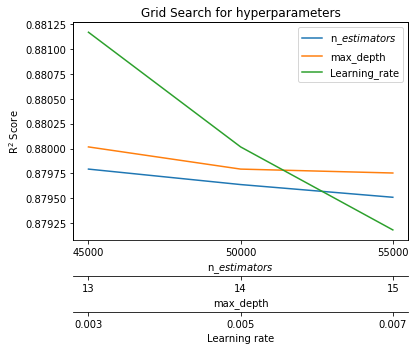

In [6]:
### import numpy as np
import matplotlib.pyplot as plt
x = [45000,50000,55000]
y = [0.87979318, 0.87963779, 0.87951007]
x1 = [13,14,15]
y1 = [0.88001607, 0.87979318, 0.87975392]
x2 = [0.003,0.005,0.007]
y2=[0.88116848, 0.88001607, 0.87918202]

fig = plt.figure()

ax1= fig.add_subplot(111)
ax1.legend(loc='upper left')
ax1.set_xlabel(r"n_$estimators$")
ax1.set_ylabel(r"R$^2$ Score")
ax1.set_title(r"Grid Search for hyperparameters")
ax1.plot(x,y,label=r"n_$estimators$")
plt.xticks([45000,50000,55000])
plt.legend(loc='upper right')


ax2 = ax1.twiny()
newlabel=[13,14,15]
newpos = [45000,50000,55000]
ax2.set_xticks(newpos)
ax2.set_xticklabels(newlabel)
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 36))
ax2.set_xlabel('max_depth')
ax2.set_xlim(ax1.get_xlim())
#(x,y, label=r"$L_{\rm MAPE}$")


ax1.plot(x,y1,label=r"max_depth")
ax1.plot(x,y2,label=r"Learning_rate")
ax3 = ax1.twiny()

#new_tick_locations = np.array([13,14,15])
newlabel= [0.003,0.005,0.007]

newpos = [45000,50000,55000]
ax3.set_xticks(newpos)
ax3.set_xticklabels(newlabel)
ax3.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax3.spines['bottom'].set_position(('outward', 72))
ax3.set_xlabel('Learning rate')
ax3.set_xlim(ax1.get_xlim())

ax1.legend(loc='upper right')
plt.savefig(r"hy.png")


plt.show()

# Combine Forecasting

In [9]:

data = pd.read_csv("/Users/lilian/Desktop/project/sample_submission 106.csv",encoding = "ISO-8859-1")
Data1 = pd.DataFrame(data)
data = pd.read_csv("/Users/lilian/Desktop/project/sample_submission 101.csv",encoding = "ISO-8859-1")
Data2 = pd.DataFrame(data)
Y_pred1= Data1[['Predicted']]
Y_pred2= Data2[['Predicted']]
print(Y_pred1.shape)
print(Y_pred2.shape)
#Y_pred = 0.48*Y_pred1+0.52*Y_pred2
Y_pred = 0.60*Y_pred1+0.40*Y_pred2

#0.40,0.60 12.87387
#0.35,0.65 12.87851
Y_pred = np.array(Y_pred.values).reshape(len(Y_pred),)
print(Y_pred.shape)
df = pd.DataFrame({"Predicted": Y_pred})
export_csv = df.to_csv ('sub_iuu.csv')

(30074, 1)
(30074, 1)
(30074,)


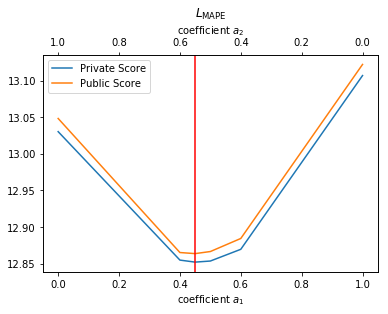

<Figure size 432x288 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#x = [0, 0.3, 0.4, 0.45, 0.47, 0.5, 0.6, 0.7, 1]
#y=  [13.38143, 13.12035, 13.10305, 13.0053,13.10069,  13.10220,13.11951, 13.15695, 13.28248]
x = [0,0.4,0.45,0.50,0.60,1]
y= [13.03027,12.85489,12.85213, 12.85361, 12.86963, 13.10687 ]
y1 = [13.04827, 12.86522, 12.86374, 12.86658, 12.88442, 13.12205]


fig = plt.figure()

ax1= fig.add_subplot(111)
ax1.set_title(r"$L_{\rm MAPE}$")
ax2 = ax1.twiny()
ax1.plot(x,y, label=r"Private Score")
#(x,y, label=r"$L_{\rm MAPE}$")

ax1.plot(x,y1,label=r"Public Score")
ax1.axvline(x=0.45,color='red')
ax1.legend(loc='upper left')
ax1.set_xlabel(r"coefficient $a_1$")

new_tick_locations = np.array([0, 0.2, 0.4,  0.6, 0.8, 1])

def tick_function(x):
    V = 1-x 
    return ["%.1f" %z for z in V]

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel(r"coefficient $a_2$")
plt.show()
plt.savefig(r"cofficient.png")


